In [67]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [68]:
def csv_to_dataframe(path_general,dataset):

    path=os.path.join(path_general, 'us_census_full', dataset)
    df= pd.read_csv(path, header=0,sep=',\s', na_values=["?"],engine='python')
    df=df.drop(['instance_weight'], axis=1)
    return df

path_general="/Users/pierregagliardi/DossierTravail/Programmation/PythonPath/Us_Census"
training_set='census_income_learn.csv'
testing_set='census_income_test.csv'
df_train=csv_to_dataframe(path_general,training_set)
df_test=csv_to_dataframe(path_general,testing_set)

df_total = pd.concat([df_train, df_test],ignore_index=True)
df.dtypes

age                                          int64
class_of_worker                             object
industry_recode                             object
occupation_recode                           object
education                                   object
wage_per_hour                                int64
enroll_in_edu_inst_last_wk                  object
marital_stat                                object
major_industry_code                         object
major_occupation_code                       object
race                                        object
hispanic_origin                             object
sex                                         object
member_of_a_labor_union                     object
reason_for_unemployment                     object
full_or_part_time_employment_stat           object
capital_gains                                int64
capital_losses                               int64
dividends_from_stocks                        int64
tax_filer_stat                 

In [71]:
#Change types of features which has int64 instead of Object type
list_wrong_types=['veterans_benefits','own_business_or_self_employed','industry_recode','occupation_recode','year']
df_total[list_wrong_types]=df_total[list_wrong_types].applymap(str)
df_total.dtypes

age                                          int64
class_of_worker                             object
industry_recode                             object
occupation_recode                           object
education                                   object
wage_per_hour                                int64
enroll_in_edu_inst_last_wk                  object
marital_stat                                object
major_industry_code                         object
major_occupation_code                       object
race                                        object
hispanic_origin                             object
sex                                         object
member_of_a_labor_union                     object
reason_for_unemployment                     object
full_or_part_time_employment_stat           object
capital_gains                                int64
capital_losses                               int64
dividends_from_stocks                        int64
tax_filer_stat                 

In [58]:
df_total.head()

,age,class_of_worker,industry_recode,occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran_admin,veterans_benefits,weeks_worked_in_year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [59]:
df_total.describe()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year
count,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000
mean,34.538998,55.105027,431.742176,36.849010,195.851259,1.956172,23.178375
std,22.318468,273.340729,4670.768536,269.789771,1937.847082,2.364857,24.404016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
75%,50.000000,0.000000,0.000000,0.000000,0.000000,4.000000,52.000000
max,90.000000,9999.000000,99999.000000,4608.000000,99999.000000,6.000000,52.000000


In [60]:
print('Number of persons in dataset: %d'%df_total.shape[0])

Number of persons in dataset: 299285


In [74]:
nb_person_total=float(df_total['target'].count())

nb_persons_minus_50000=df_total[df_total['target']=='- 50000.']['target'].count()
print('Number of persons -50000: %d, %.2f pct'%(nb_persons_minus_50000,nb_persons_minus_50000/nb_person_total*100))

nb_persons_plus_50000=df_total[df_total['target']=='50000+.']['target'].count()
print('Number of persons +50000: %d, %.2f pct'%(nb_persons_plus_50000,nb_persons_plus_50000/nb_person_total*100))



Number of persons -50000: 280717, 93.80 pct
Number of persons +50000: 18568, 6.20 pct


In [75]:
nb_person_total=float(df.shape[0])
columns=df.columns

for column in columns:
    nb_missing_value=df[df[column].isnull()].shape[0]
    print('%s contains %.2f pct missing value \n'%(column,nb_missing_value/nb_person_total*100))
    

age contains 0.00 pct missing value 

class_of_worker contains 0.00 pct missing value 

industry_recode contains 0.00 pct missing value 

occupation_recode contains 0.00 pct missing value 

education contains 0.00 pct missing value 

wage_per_hour contains 0.00 pct missing value 

enroll_in_edu_inst_last_wk contains 0.00 pct missing value 

marital_stat contains 0.00 pct missing value 

major_industry_code contains 0.00 pct missing value 

major_occupation_code contains 0.00 pct missing value 

race contains 0.00 pct missing value 

hispanic_origin contains 0.43 pct missing value 

sex contains 0.00 pct missing value 

member_of_a_labor_union contains 0.00 pct missing value 

reason_for_unemployment contains 0.00 pct missing value 

full_or_part_time_employment_stat contains 0.00 pct missing value 

capital_gains contains 0.00 pct missing value 

capital_losses contains 0.00 pct missing value 

dividends_from_stocks contains 0.00 pct missing value 

tax_filer_stat contains 0.00 pct mis

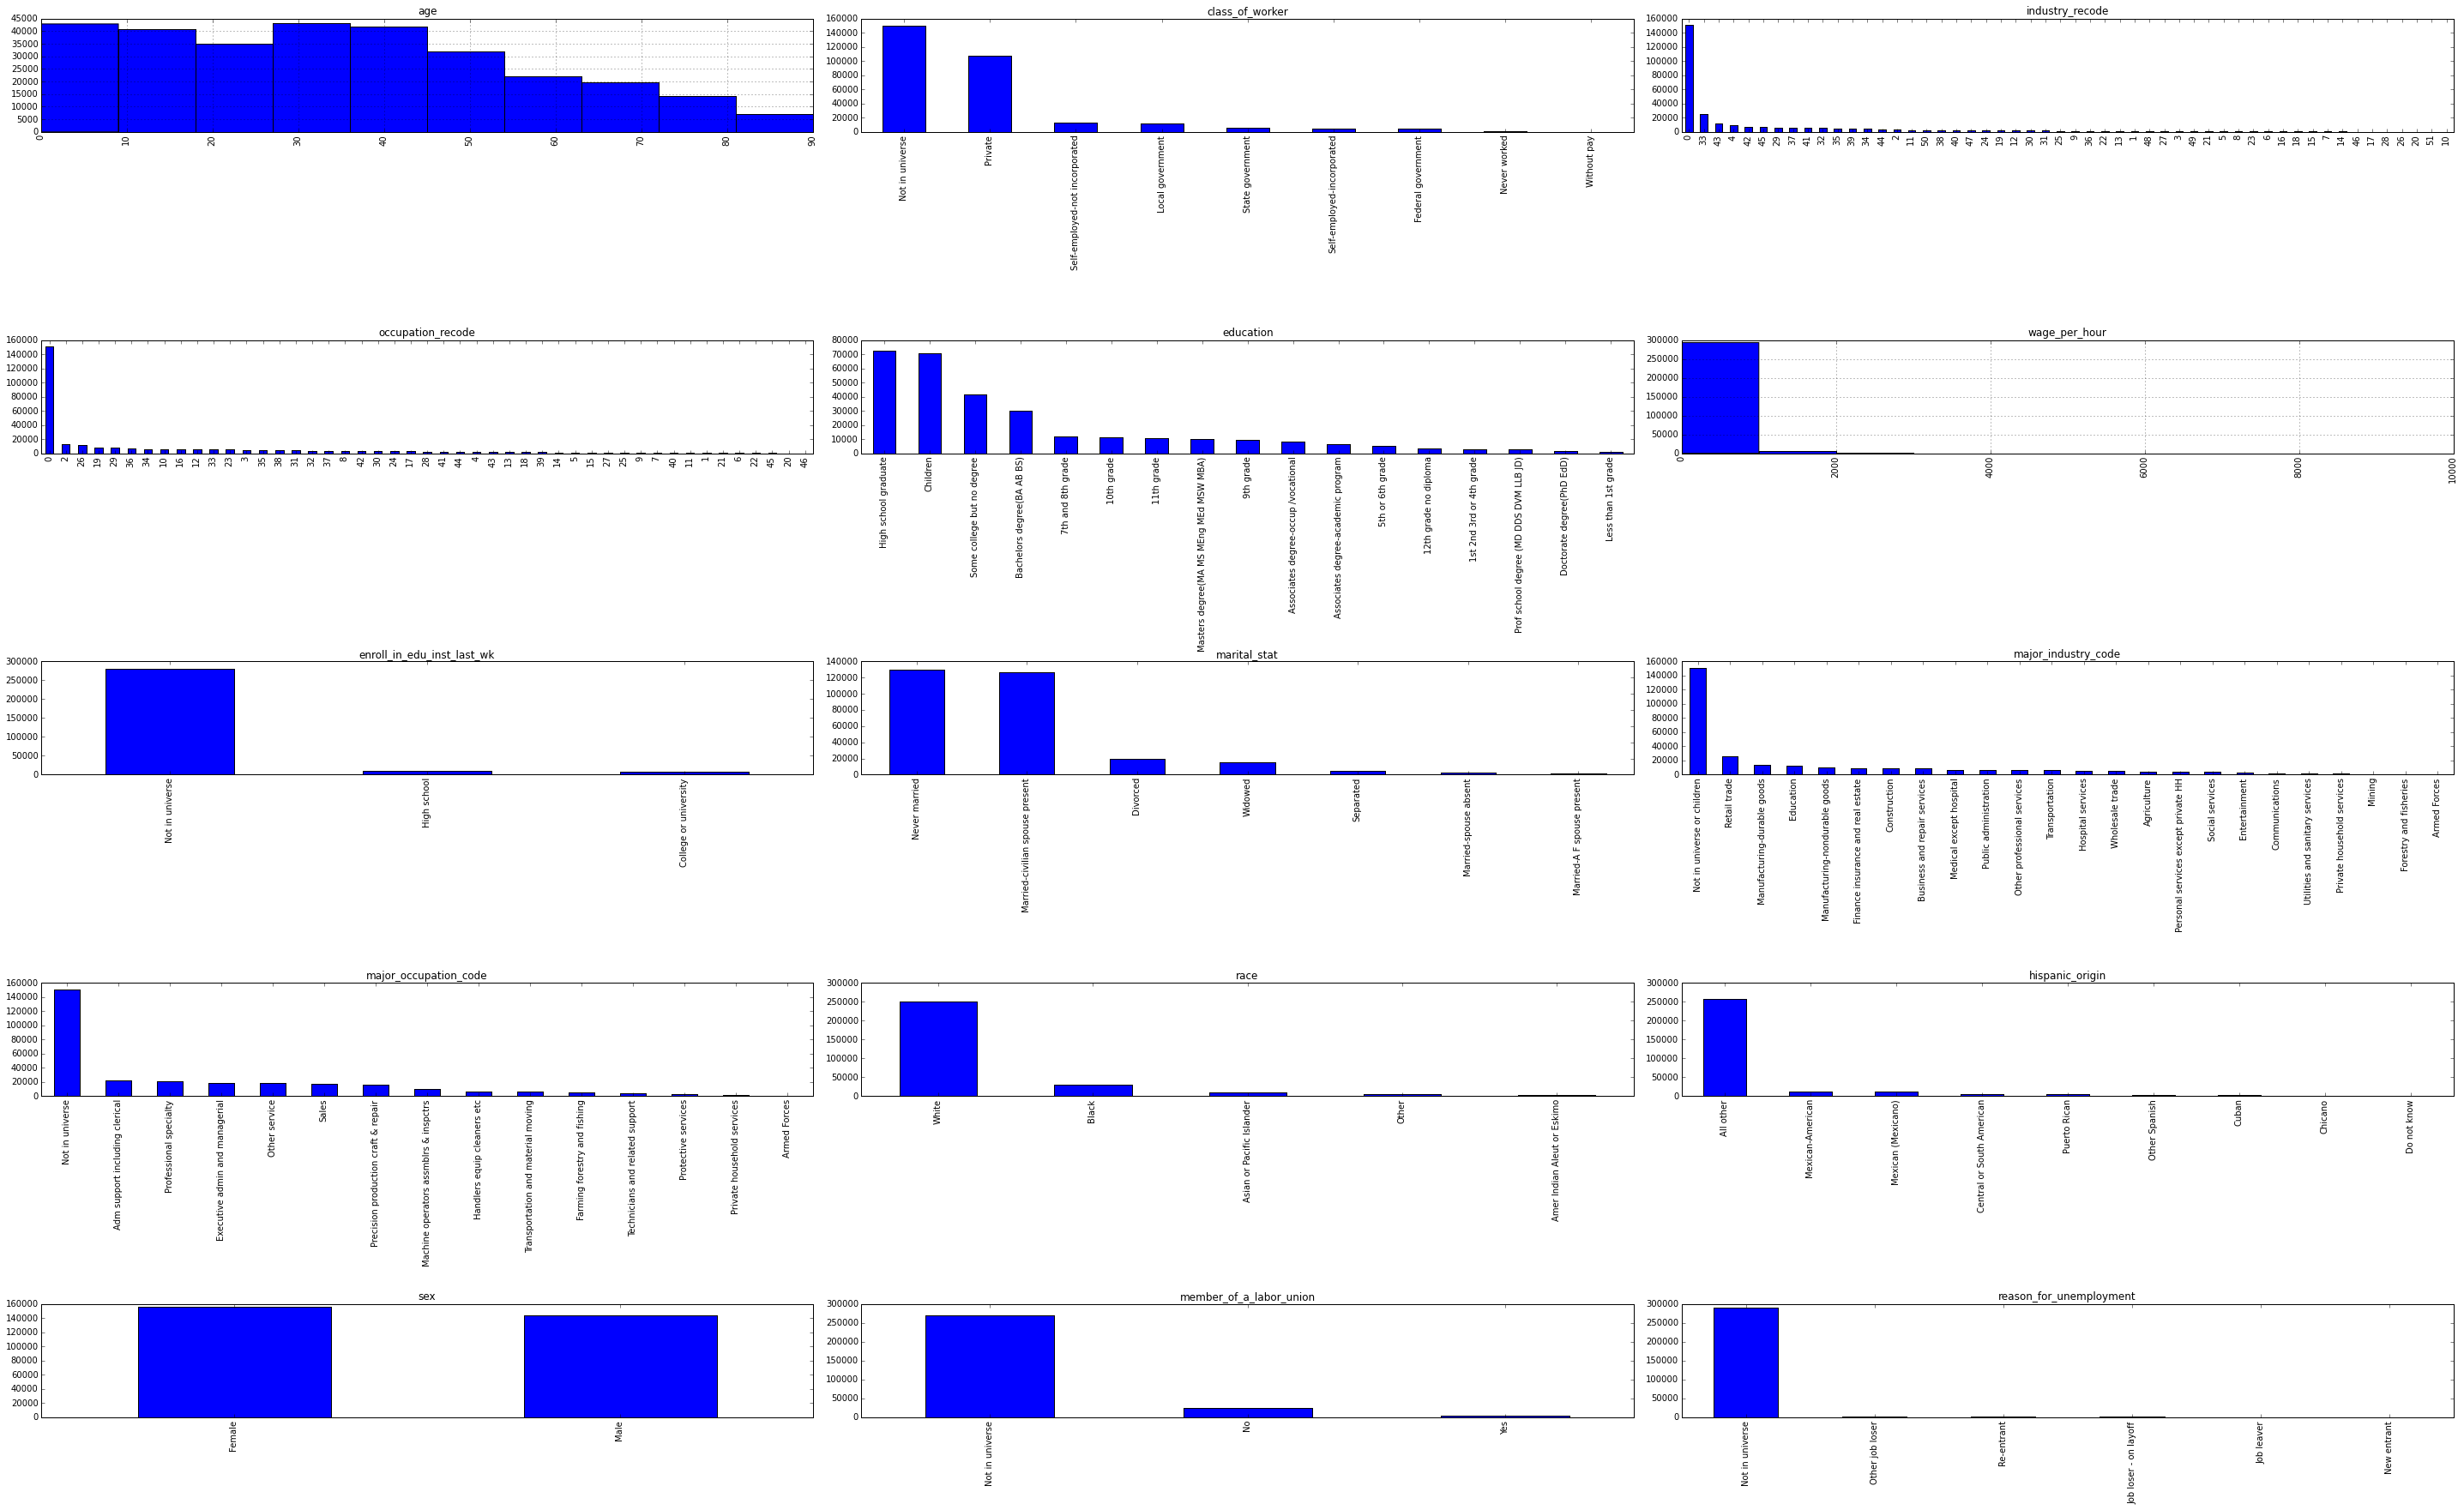

In [63]:
#=========FIRST FIFTEEN features display===================#
fig = plt.figure(figsize=(40,70))
cols = 3
rows = math.ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns[:15]):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
        plt.tight_layout()

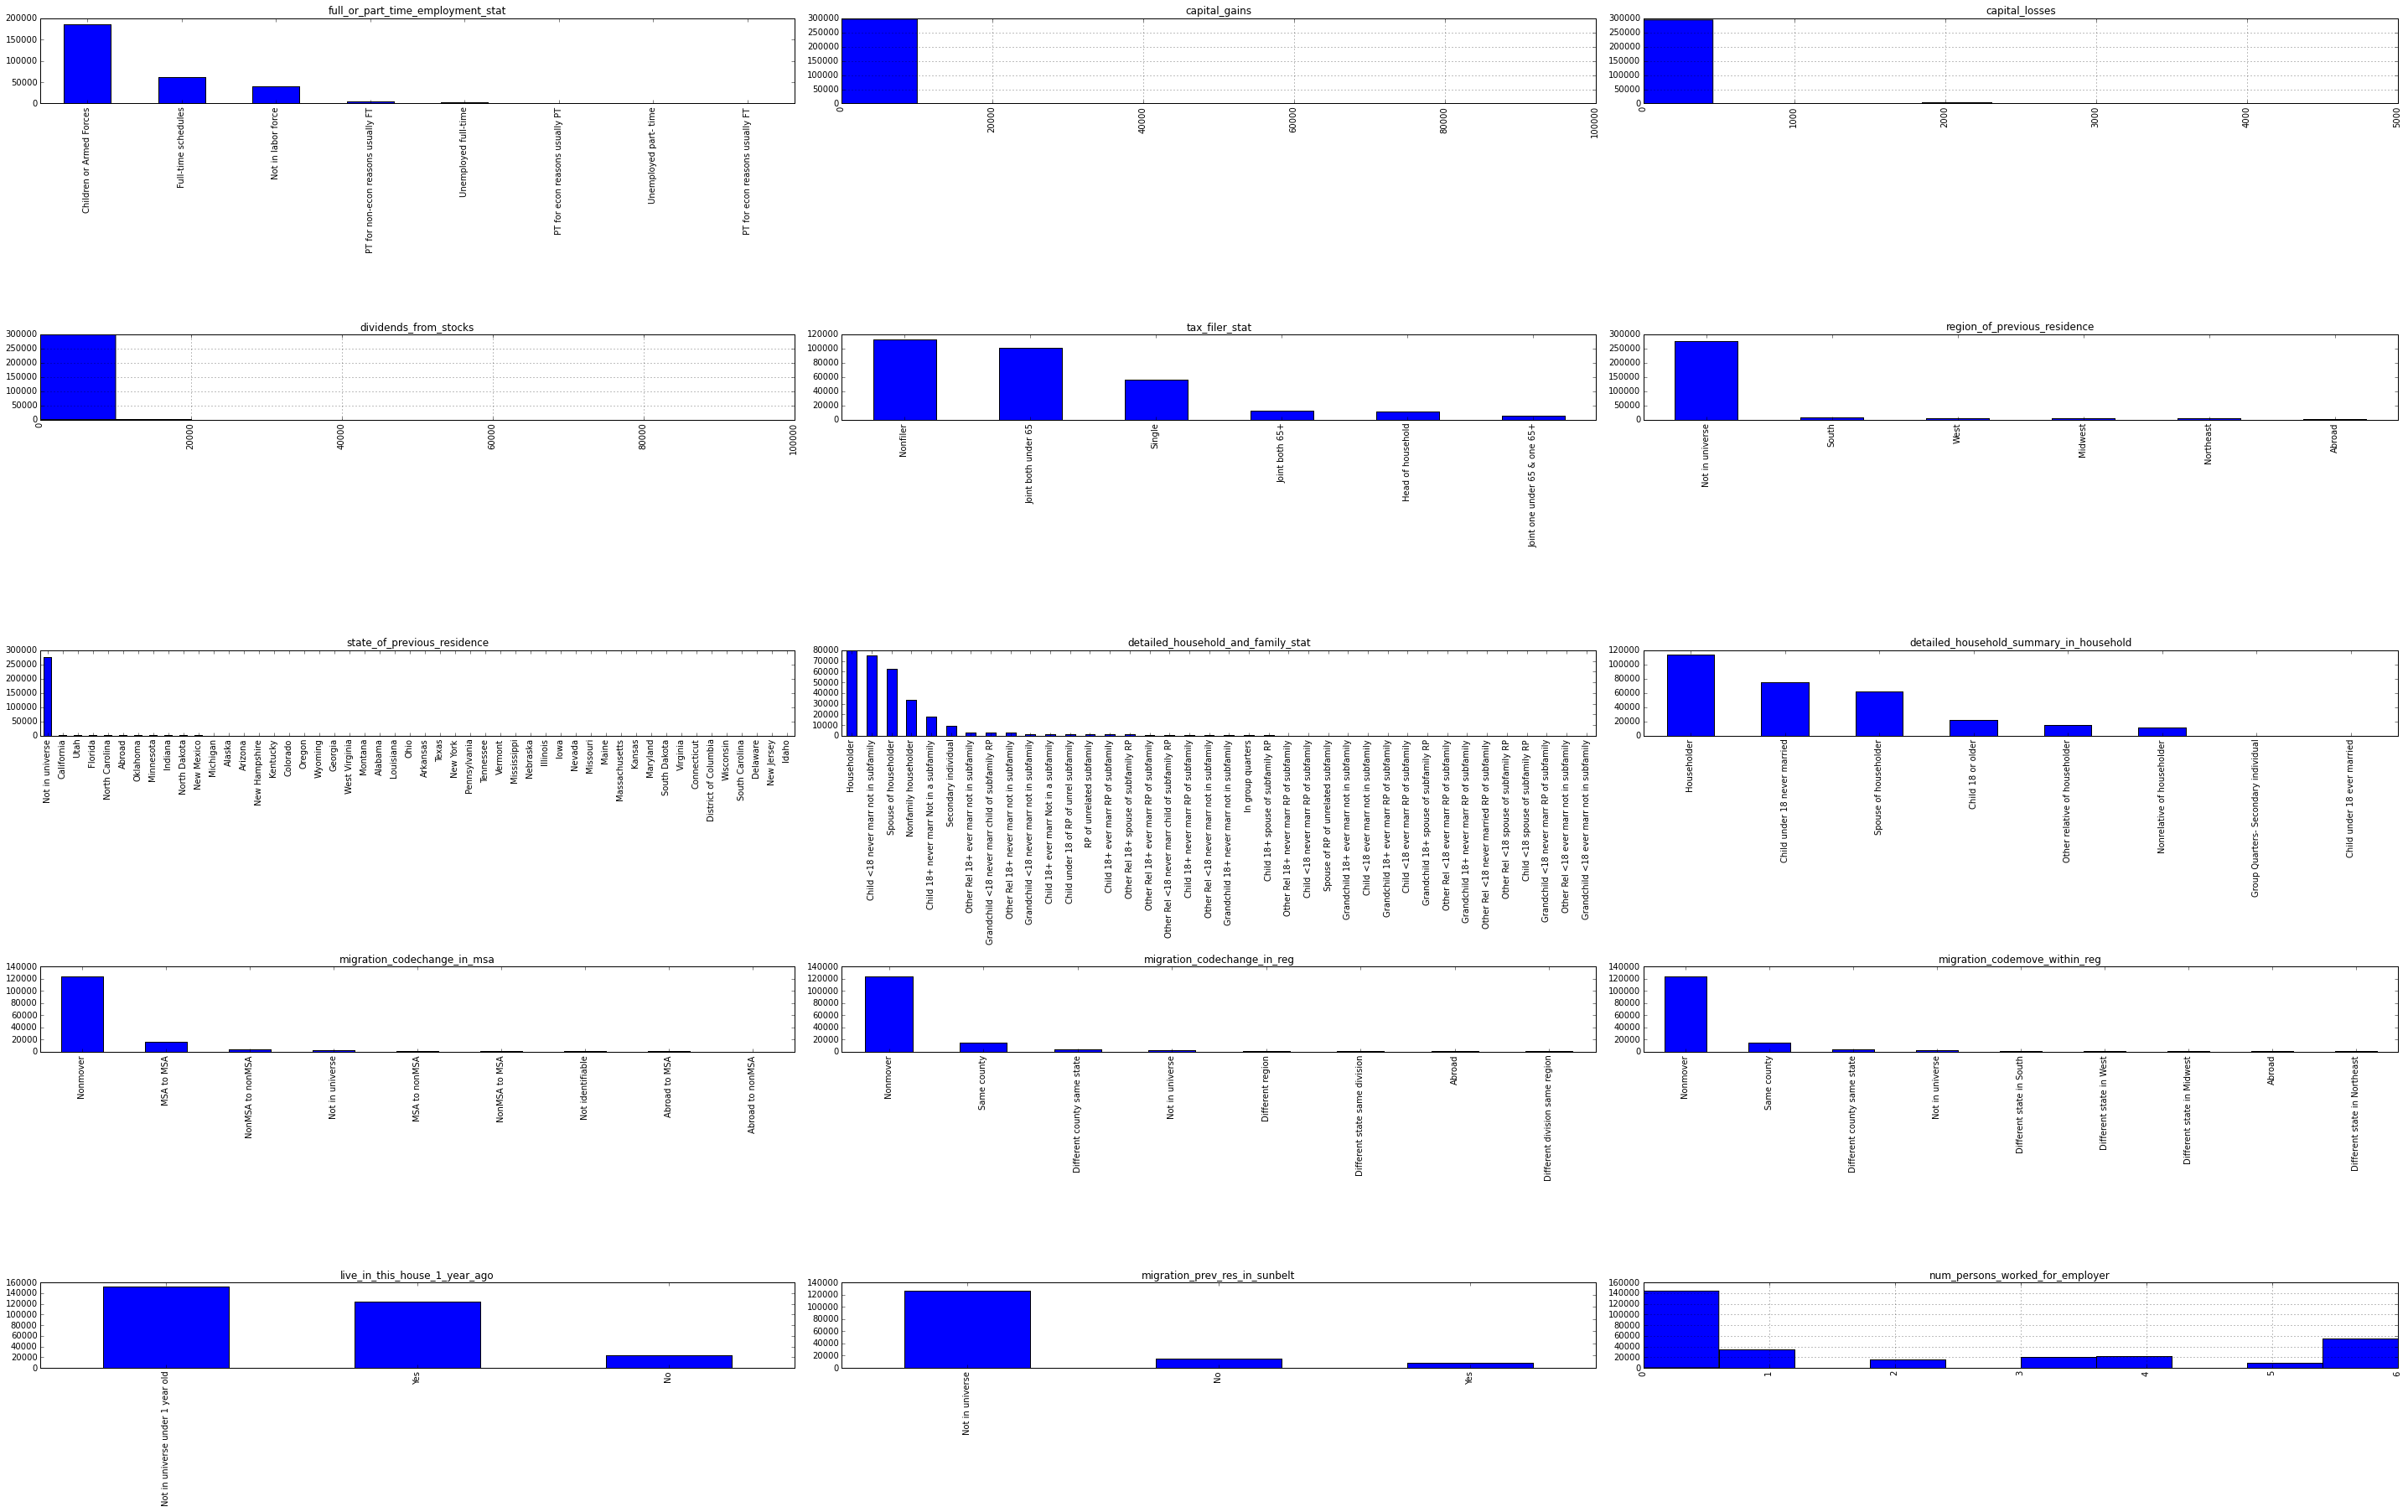

In [64]:
#=========FIFTEEN TO THIRTH features display===================#
fig = plt.figure(figsize=(40,70))
cols = 3
rows = math.ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns[15:30]):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
        plt.tight_layout()

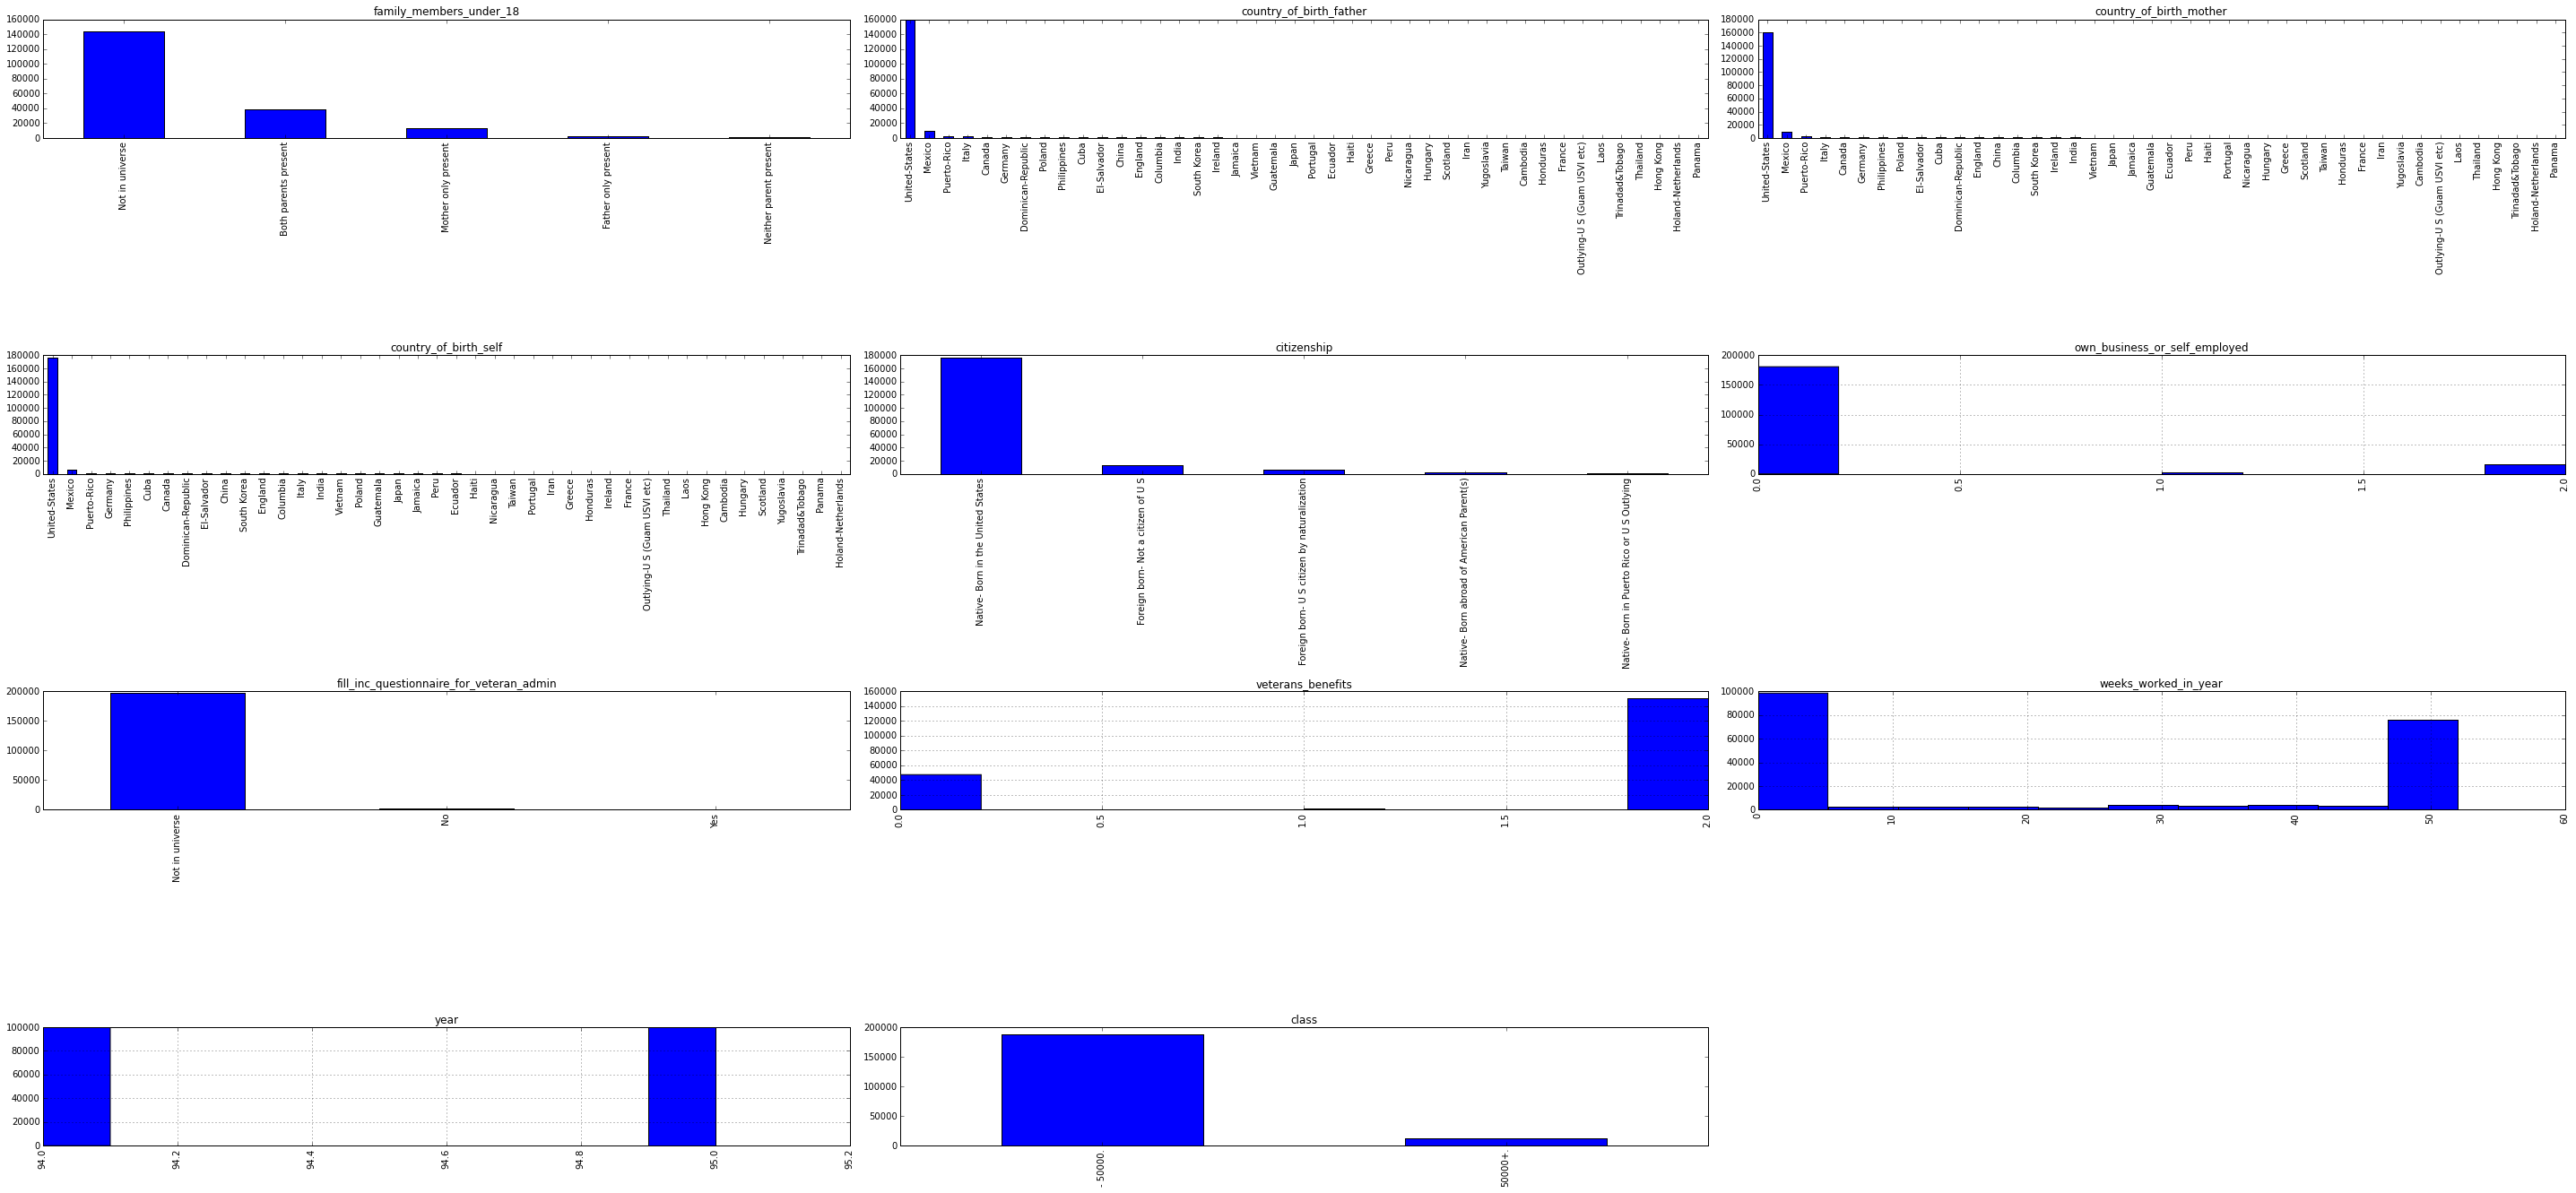

In [54]:
fig = plt.figure(figsize=(40,70))
cols = 3
rows = math.ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns[30:42]):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
        plt.tight_layout()

In [24]:
no=['All other','Do not know']

yes=['Central or South American','Mexican (Mexicano)','Mexican-American','Other Spanish','Puerto Rican','Cuban','Chicano']

hispanic_countries=['Mexico','Puerto-Rico','Ecuador','Guatemala','Nicaragua','Guatemala','Nicaragua','Cuba','Dominican-Republic','El-Salvador']


df_hispanic=df[['hispanic_origin','country_of_birth_self', 'country_of_birth_father','country_of_birth_mother']]

df['hispanic_simplified']='no'

for i,row in df_hispanic.iterrows():
    if (row['hispanic_origin'] in yes): 
        df.loc[i,'hispanic_simplified']='yes'
    elif (row['hispanic_origin'] in no):
        df.loc[i,'hispanic_simplified']='no'
    elif (row['hispanic_origin']==np.nan):
        if (row['country_of_birth_self'] or row['country_of_birth_father']or row['country_of_birth_mother'] in hispanic_countries):
            df.loc[i,'hispanic_simplified']='yes'
        else:
            df.loc[i,'hispanic_simplified']='no'
    
        

In [36]:
df[['hispanic_origin','hispanic_simplified']].head(20)

KeyError: "['hispanic_simplified'] not in index"

In [30]:
df['gain_total']=df['capital_gains']-df['capital_losses']+df['dividends_from_stocks']
df['income']=df['wage_per_hour']*df['weeks_worked_in_year']

In [33]:
df[['income','wage_per_hour','weeks_worked_in_year']].head()

,income,wage_per_hour,weeks_worked_in_year
0,0,0,0
1,0,0,52
2,0,0,0
3,0,0,0
4,0,0,0


In [35]:
df[['gain_total','capital_gains','capital_losses','dividends_from_stocks']].head(25)

,gain_total,capital_gains,capital_losses,dividends_from_stocks
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,5178,5178,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0
